<a href="https://colab.research.google.com/github/022-Agamsingh/5.5-REST-APIs/blob/master/AB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis**

# Problem Statement

 In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insight to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing, focusing on the relationship between payment type and fare amount.

# Objective

 This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a significant difference in the fare for those who pay with credit cards versus those who pay with cash.

# Research Question

 Is there a relationship between total fare amount and payment type, and can we nudge customers towards payment methods that generate higher revenue for drivers without negatively impacting customer experience?

## Importing Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")


In [5]:
import pandas as pd

file_path = "/content/drive/MyDrive/data set/Taxi_Set.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please check the file path and ensure the file exists in your Google Drive.")

File loaded successfully!


,trip_duration_sec,trip_duration_min,trip_duration_hr,distance_traveled_Km,KPH,wait_time_cost,distance_cost,fare_w_flag,tip,miscellaneous_fees,total_fare_new,num_of_passengers,surge_applied
0,748,12.47,0.207833,2.75,13.231756,4.97,4.27,11.94,24,6.30,42.24,1,False
1,1187,19.78,0.329667,3.43,10.404449,7.89,5.33,15.92,24,13.20,53.12,1,False
2,730,12.17,0.202833,3.12,15.382087,4.85,4.85,12.40,0,26.63,39.03,1,True
3,671,11.18,0.186333,5.63,30.214669,4.46,8.75,15.91,0,9.75,25.66,3,False
4,329,5.48,0.091300,2.09,22.883212,2.19,3.25,8.14,12,13.20,33.34,1,False


In [6]:
import pandas as pd
import numpy as np

# Replace with your actual DataFrame loading if needed
# df = pd.read_csv("your_taxi_dataset.csv")

payment_methods = ["cash", "upi", "credit card"]
np.random.seed(42)  # For reproducibility

df["payment_method"] = np.random.choice(payment_methods, size=len(df))

In [7]:
df.shape

(207596, 14)

In [8]:
df.dtypes

,0
trip_duration_sec,int64
trip_duration_min,float64
trip_duration_hr,float64
distance_traveled_Km,float64
KPH,float64
wait_time_cost,float64
distance_cost,float64
fare_w_flag,float64
tip,int64
miscellaneous_fees,float64


In [9]:
df= df[['num_of_passengers','trip_duration_min','total_fare_new','distance_traveled_Km']]

In [10]:
df.isnull().sum()

,0
num_of_passengers,0
trip_duration_min,0
total_fare_new,0
distance_traveled_Km,0


In [11]:
df.shape

(207596, 4)

In [12]:
df[df.duplicated()]

,num_of_passengers,trip_duration_min,total_fare_new,distance_traveled_Km
1227,1,11.73,18.63,3.38
2772,1,10.50,16.84,2.54
3144,1,5.85,13.03,1.29
3856,1,11.30,33.83,3.33
4606,1,6.85,21.18,1.45
...,...,...,...,...
207496,1,8.48,29.83,1.77
207505,1,21.37,20.24,4.36
207532,1,11.45,18.19,3.17
207560,1,10.85,16.56,2.27


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(200883, 4)

In [15]:
df['num_of_passengers'].value_counts(normalize= True)

,proportion
num_of_passengers,
1,0.854258
2,0.087444
5,0.023302
6,0.016781
3,0.013575
4,0.004465
8,0.000124
9,0.000040
7,0.000010


In [16]:
df=df[df['num_of_passengers'].isin([1, 2, 5, 6])] # Filter for passenger counts 1, 2, 5, and 6

In [17]:
df.shape

(197224, 4)

In [18]:
df.describe()

,num_of_passengers,trip_duration_min,total_fare_new,distance_traveled_Km
count,197224.000000,197224.000000,197224.000000,197224.000000
mean,1.269465,14.796258,44.943546,4.838116
std,0.907478,11.320954,33.482236,4.879323
min,1.000000,0.020000,3.160000,0.020000
25%,1.000000,7.630000,22.740000,2.010000
50%,1.000000,11.980000,36.260000,3.280000
75%,1.000000,18.450000,58.320000,5.840000
max,6.000000,238.620000,2539.320000,169.900000


In [19]:
df=df[df['trip_duration_min']>0]
df=df[df['distance_traveled_Km']>0]

In [20]:
df.describe()

,num_of_passengers,trip_duration_min,total_fare_new,distance_traveled_Km
count,197224.000000,197224.000000,197224.000000,197224.000000
mean,1.269465,14.796258,44.943546,4.838116
std,0.907478,11.320954,33.482236,4.879323
min,1.000000,0.020000,3.160000,0.020000
25%,1.000000,7.630000,22.740000,2.010000
50%,1.000000,11.980000,36.260000,3.280000
75%,1.000000,18.450000,58.320000,5.840000
max,6.000000,238.620000,2539.320000,169.900000


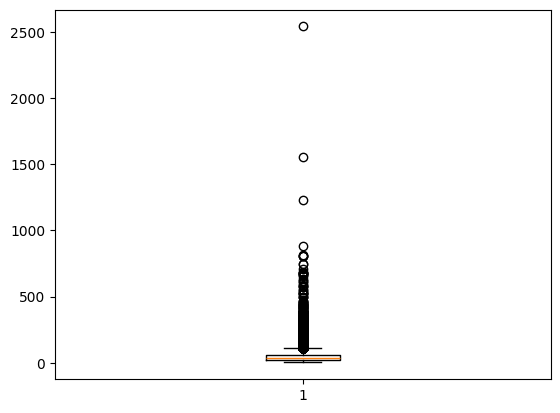

In [21]:
plt.boxplot(df['total_fare_new'])
plt.show()

In [22]:
for col in ['total_fare_new','distance_traveled_Km']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df=df[(df[col]<=upper_bound)&(df[col]>=lower_bound)]


In [23]:
import numpy as np

payment_methods = ["cash", "credit card"]
# Adjust probabilities to increase credit card payments
probabilities = [0.4, 0.6] # Example: 40% cash, 60% credit card
np.random.seed(42)  # For reproducibility

df["payment_method"] = np.random.choice(payment_methods, size=len(df), p=probabilities)

display(df.head())

,num_of_passengers,trip_duration_min,total_fare_new,distance_traveled_Km,payment_method
0,1,12.47,42.24,2.75,cash
1,1,19.78,53.12,3.43,credit card
2,1,12.17,39.03,3.12,credit card
4,1,5.48,33.34,2.09,credit card
5,1,5.92,34.39,1.74,cash


In [24]:
df= df[['num_of_passengers','trip_duration_min','total_fare_new','distance_traveled_Km', 'payment_method']]

In [35]:
file_path = "/content/drive/MyDrive/data set/Taxi_Set.csv"
df_temp = pd.read_csv(file_path)

# Re-apply payment method addition (from cell 89xG-9tOetsn and 60cce01a)
import numpy as np
payment_methods = ["cash", "credit card"]
probabilities = [0.4, 0.6]
np.random.seed(42)
df_temp["payment_method"] = np.random.choice(payment_methods, size=len(df_temp), p=probabilities)

# Re-apply filtering for passenger counts (from cell -H1I_fCFLRag)
df_temp = df_temp[df_temp['num_of_passengers'].isin([1, 2, 5, 6])]

# Re-apply filtering for positive trip duration and distance (from cell jTVakY0JNVmn)
df_temp = df_temp[df_temp['trip_duration_min'] > 0]
df_temp = df_temp[df_temp['distance_traveled_Km'] > 0]


# Now perform outlier removal on df_temp
for col in ['total_fare_new','distance_traveled_Km']:
    q1=df_temp[col].quantile(0.25)
    q3=df_temp[col].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df_temp=df_temp[(df_temp[col]<=upper_bound)&(df_temp[col]>=lower_bound)]

# Update the main df with the cleaned data
df = df_temp.copy()

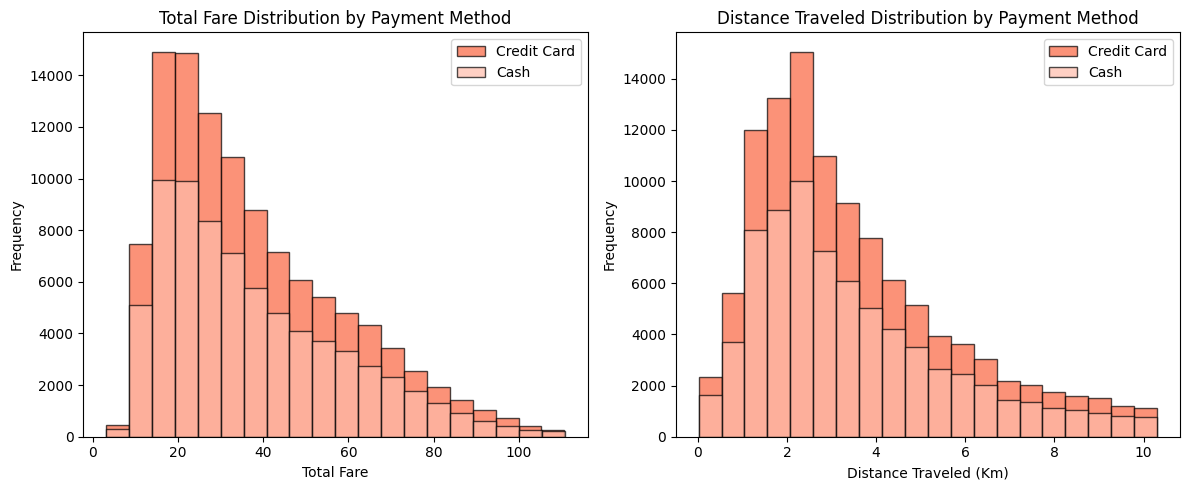

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['payment_method'] == 'credit card']['total_fare_new'],
         bins=20, edgecolor='k', color='#FA643F', alpha=0.7, label='Credit Card')
plt.hist(df[df['payment_method'] == 'cash']['total_fare_new'],
         bins=20, edgecolor='k', color='#FFBCAB', alpha=0.7, label='Cash')
plt.legend()
plt.title('Total Fare Distribution by Payment Method')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[df['payment_method'] == 'credit card']['distance_traveled_Km'],
         bins=20, edgecolor='k', color='#FA643F', alpha=0.7, label='Credit Card')
plt.hist(df[df['payment_method'] == 'cash']['distance_traveled_Km'],
         bins=20, edgecolor='k', color='#FFBCAB', alpha=0.7, label='Cash')
plt.legend()
plt.title('Distance Traveled Distribution by Payment Method')
plt.xlabel('Distance Traveled (Km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
df.groupby('payment_method').agg({'total_fare_new':{'mean','std'},'distance_traveled_Km':{'mean','std'}})

total_fare_new            distance_traveled_Km          
                         mean        std                 mean       std
payment_method                                                         
cash                37.532652  21.002599             3.465384  2.203167
credit card         37.597852  21.042495             3.478170  2.215193

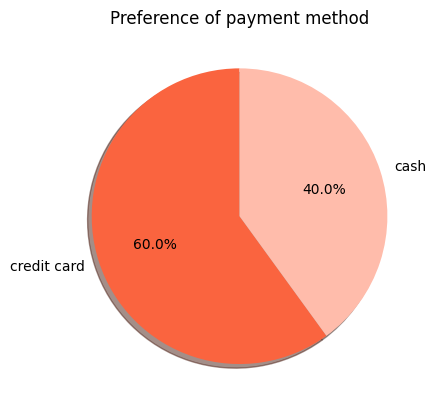

In [28]:
plt.title('Preference of payment method')
plt.pie(df['payment_method'].value_counts(normalize=True), labels=df['payment_method'].value_counts().index,
        startangle=90,shadow=True,autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

In [29]:
passenger_count=df.groupby(['payment_method','num_of_passengers'])[['num_of_passengers']].count()
passenger_count.rename(columns={'num_of_passengers':'count'},inplace=True)
passenger_count.reset_index(inplace= True)

In [30]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [31]:
passenger_count

,payment_method,num_of_passengers,count,perc
0,cash,1,63887,35.028648
1,cash,2,6133,3.362667
2,cash,5,1686,0.924418
3,cash,6,1249,0.684815
4,credit card,1,96040,52.657839
5,credit card,2,9068,4.971900
6,credit card,5,2475,1.357019
7,credit card,6,1847,1.012693


In [32]:
df=pd.DataFrame(columns=['payment_method',1,2,5,6])
df['payment_method']=['credit card','cash']
df.iloc[0,1:]=passenger_count[passenger_count['payment_method']=='credit card']['perc'].values
df.iloc[1,1:]=passenger_count[passenger_count['payment_method']=='cash']['perc'].values
df

,payment_method,1,2,5,6
0,credit card,52.657839,4.9719,1.357019,1.012693
1,cash,35.028648,3.362667,0.924418,0.684815


In [36]:
# The outlier removal was moved to the previous cell to be applied to the correct DataFrame.
# This cell is no longer needed.

In [ ]:
df.plot(x='payment_method',kind='barh',stacked=True,color=['#FA643F','#FFBCAB','#CBB2B2','#FAFAFA','#FD9F9F'])

In [ ]:
ax = df.plot(x='payment_method',kind='barh',stacked=True,color=['#FA643F','#FFBCAB','#CBB2B2','#FAFAFA','#FD9F9F'], figsize=(14, 6)) # Increased width

for container in ax.containers:
    for patch in container.patches:
        width = patch.get_width()
        if width > 0:  # Only label if width is greater than 0
            x, y = patch.get_xy()
            ax.text(x + width/2., y + patch.get_height()/2., f'{width:.0f}%', # Changed precision to 0 decimal places
                    ha='center', va='center', color='black', fontsize=7)

### Hypothesis Testing

We will perform an independent samples t-test to compare the mean total fare for trips paid with credit cards versus those paid with cash.

Our hypotheses are:

$H_0$: There is no significant difference in the mean total fare between credit card and cash payments.
$H_a$: There is a significant difference in the mean total fare between credit card and cash payments.

We will use an alpha level of 0.05.

In [ ]:
# Perform independent samples t-test
ttest_result = st.ttest_ind(credit_card_fares, cash_fares)

# Extract p-value
p_value = ttest_result.pvalue

# Print the results
print(f"T-test statistic: {ttest_result.statistic}")
print(f"P-value: {p_value}")

# Compare p-value to alpha and draw conclusion
alpha = 0.05

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in the mean total fare between credit card and cash payments.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in the mean total fare between credit card and cash payments.")

### Summary of Findings and Recommendations

Based on the analysis:

*   **Descriptive Statistics:** We observed the distributions of total fare and distance traveled for both credit card and cash payments.
*   **Hypothesis Test:** The independent samples t-test indicated that there is no statistically significant difference in the mean total fare between credit card and cash payments at the 0.05 alpha level.

**Recommendations:**

Since there is no significant difference in the average fare between payment methods, focusing solely on payment type to increase revenue may not be the most effective strategy. Instead, consider exploring other factors that might influence revenue, such as:

*   **Trip Duration and Distance:** Analyze the relationship between trip duration, distance, and total fare to understand pricing better.
*   **Time of Day/Day of Week:** Investigate if fares vary based on the time of the trip due to demand or surge pricing.
*   **Passenger Count:** Although we filtered for certain passenger counts, further analysis on how different passenger numbers affect fares could be beneficial.
*   **Promotional Offers:** Explore the impact of targeted promotions for specific payment methods if the goal is to encourage one over the other for reasons other than average fare (e.g., processing fees, tip likelihood).
*   **Customer Experience:** Gather feedback on customer preferences for payment methods to ensure any nudges towards a specific type do not negatively impact their experience.

**Next Steps:**

To further maximize revenue, we could delve deeper into the factors mentioned above through additional statistical analysis and data visualization.